        
        
        
        
        
        # Discrete Fourier Transform

Q1. Compute the 8-point DFT of the following sequences. Plot the magnitude and phase spectrum. Observe the symmetry properties.
<ol>
  <li>x[n] = {1,1,0,0,0,0,0,1}</li>
  <li>x[n] = {0,1,1,0,0,0,-1,-1}</li>
  <li>x[n] = {1,1,1,1,1,1,1,1}</li>
</ol>

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.fft.fft.html#numpy.fft.fft

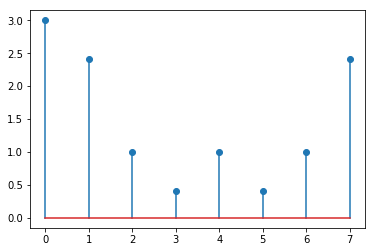

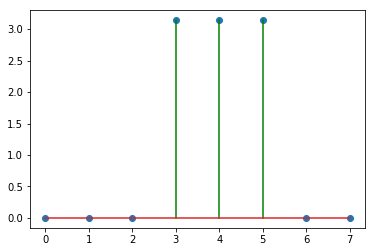

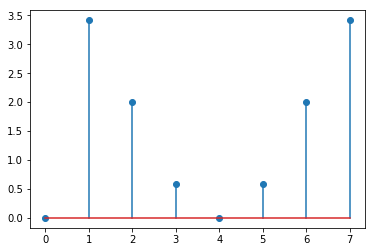

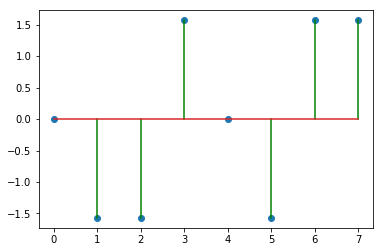

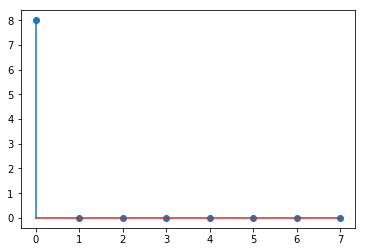

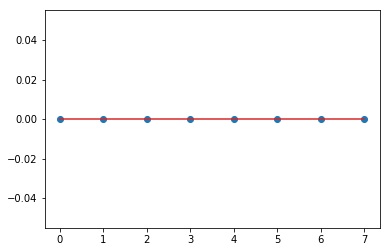

In [2]:
import numpy as np
import matplotlib.pyplot as plt

k = range(8)
a = np.array([1,1,0,0,0,0,0,1])
A = np.fft.fft(a,8)

#print(A)

plt.stem(k,abs(A))
plt.show()

angles = np.angle(A)
plt.stem(k, angles, 'g')
plt.show()
k = range(8)
a = np.array([0,1,1,0,0,0,-1,-1])
A = np.fft.fft(a,8)

#print(A)

plt.stem(k,abs(A))
plt.show()

angles = np.angle(A)
plt.stem(k, angles, 'g')
plt.show()

k = range(8)
a = np.array([1,1,1,1,1,1,1,1])
A = np.fft.fft(a,8)

#print(A)

plt.stem(k,abs(A))
plt.show()

angles = np.angle(A)
plt.stem(k, angles, 'g')
plt.show()

Q2. Generate the finite duration sequence $x[n] = 0.5(1-cos({\pi}n/20)), ~~0{\le}n{\lt}20$.
<ol>
  <li>Append the sequence with sufficient number of zeros to compute the DFT of the sequence with length N= 32 and 256. Plot the DFT and comment on the effects of zero padding</li>
  <li>Insert 16 zeros in the beginning of the sequence and repeat.</li>
</ol>


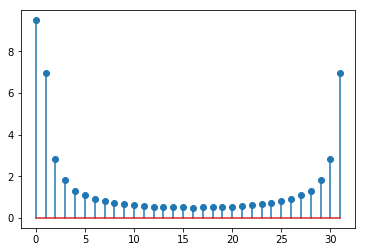

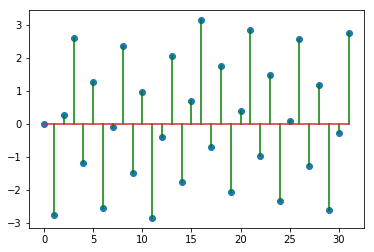

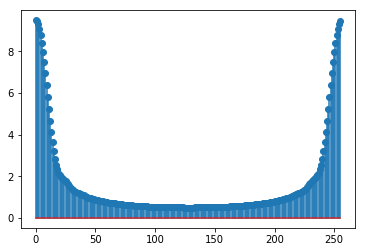

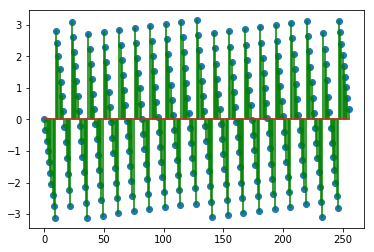

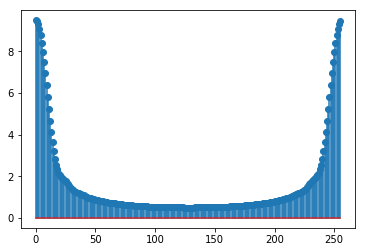

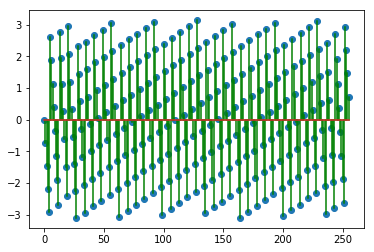

In [29]:
import numpy as np
import matplotlib.pyplot as plt
n = np.arange(0,20)
k = np.arange(0,32)
a = 0.5*(1-np.cos(np.pi*(n/20)))
y = np.fft.fft(a,32)
plt.stem(k,abs(y))
plt.show()

angles = np.angle(y)
plt.stem(k, angles, 'g')
plt.show()

k2 = np.arange(0,256)
y = np.fft.fft(a,256)
plt.stem(k2,abs(y))
plt.show()

angles = np.angle(y)
plt.stem(k2, angles, 'g')
plt.show()

#part 2
z=np.zeros(16)
z1=np.append(z,a)
y = np.fft.fft(z1,256)
plt.stem(k2,abs(y))
plt.show()

angles = np.angle(y)
plt.stem(k2, angles, 'g')
plt.show()

Q3. Plot the 32 point DFT of the following signals and comment on the spectral estimate.
<ol>
  <li>$x[n] = cos(3{\pi}n/8)$</li>
  <li>$x[n] = cos(3{\pi}n/16)$</li>
  <li>$x[n] = cos(3{\pi}n/17)$</li>
</ol>

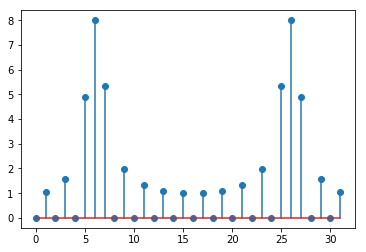

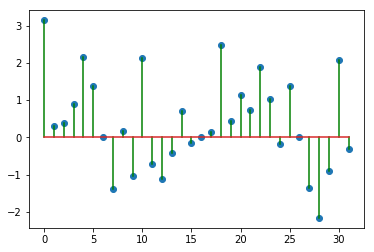

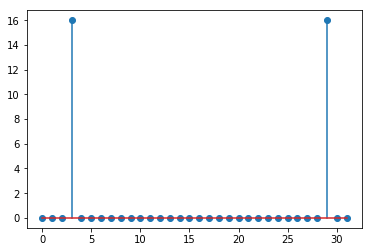

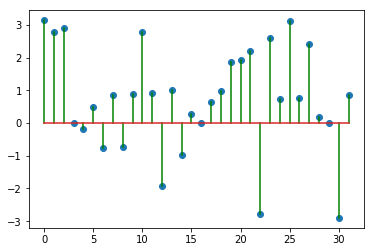

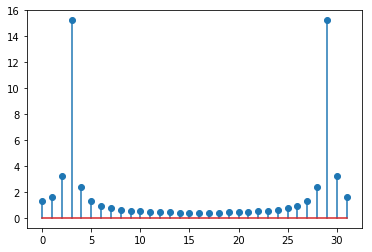

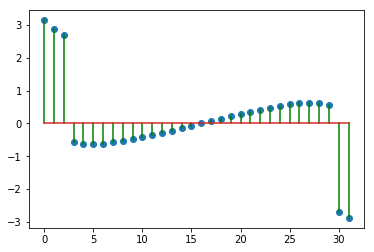

In [33]:
n = np.arange(0,16)
k = np.arange(0,32)
a = np.cos(3*np.pi*(n/8))
y = np.fft.fft(a,32)
plt.stem(k,abs(y))
plt.show()

n = np.arange(0,32)
angles = np.angle(y)
plt.stem(k, angles, 'g')
plt.show()
a = np.cos(3*np.pi*(n/16))
y = np.fft.fft(a,32)
plt.stem(k,abs(y))
plt.show()

angles = np.angle(y)
plt.stem(k, angles, 'g')
plt.show()

n = np.arange(0,34)
a = np.cos(3*np.pi*(n/17))
y = np.fft.fft(a,32)
plt.stem(k,abs(y))
plt.show()

angles = np.angle(y)
plt.stem(k, angles, 'g')
plt.show()

In [ ]:
#second doesnt give values in between

Q4. Estimation of signal corrupted by noise: Generate the signal $s[n] = cos({\pi}5n/32) +cos({\pi}21n/64) $ for 256 samples. Generate a noisy version of the signal x[n]  by adding white gaussian noise e[n] with variance 0.3 to the original signal s[n]. Compute the energy in the error signal $\sum_{n}^{}(x[n] - s[n])^2$ 
<ul>
  <li>Plot the 256 point DFTs $S[k]$ and $X[k]$. Find the set $S_{nz}$ of the values of $k$ for which $S[k]$ is non-zero.</li>
  <li>Find $\hat{X}[k] = X[k]$ if  $k~ \in \mathcal ~{S_{nz}}$ and zero otherwise. Find the IDFT $\hat{x}[n]$ from $\hat{X}[k]$ to recover the original signal. Plot $\hat{x}[n]$. Find the error signal energy after recovery $\sum_{n}^{}(\hat{x}[n] - s[n])^2$</li>
</ul>

79.8082297071


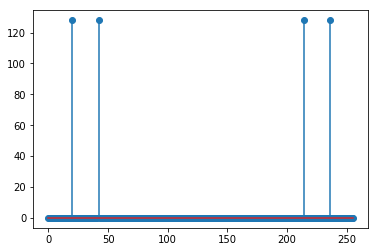

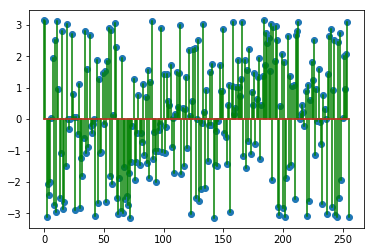

[  20.   42.  214.  236.]


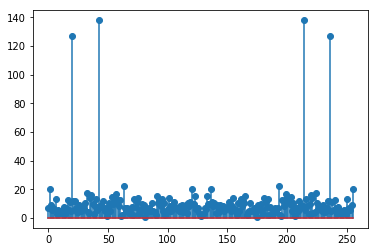

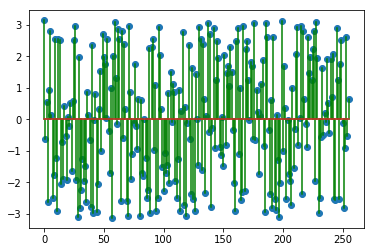

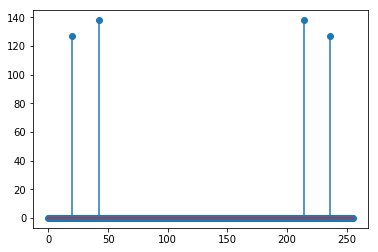

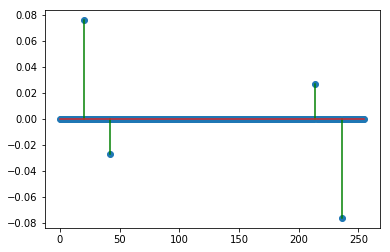

/opt/anaconda/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


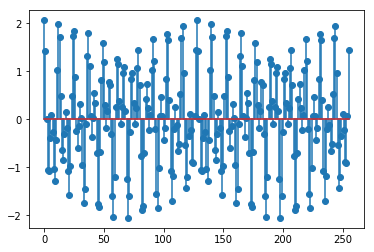

NameError: name 'eng' is not defined

In [62]:
n=np.arange(0,256)
s_n=np.cos((np.pi*5*n)/32)+np.cos((np.pi*21*n)/64)
s = np.random.normal(0,0.547722558,256)
x_n=s_n+s
sum1=0
e=np.power(s,2)
for i in e:
    sum1=sum1+i
print(sum1)
j=0
new=np.array([])
y = np.fft.fft(s_n,256)
for i in y:
    if i>0.00001:
        new=np.append(new,j)
    j=j+1
plt.stem(n,abs(y))
plt.show()

angles = np.angle(y)
plt.stem(n, angles, 'g')
plt.show()
print(new)
y2 = np.fft.fft(x_n,256)
plt.stem(n,abs(y2))
plt.show()

angles = np.angle(y2)
plt.stem(n, angles, 'g')
plt.show()
j=0
new2=np.array([])
for i in y:
    if i>0.00001:
        new2=np.append(new2,y2[j])
    else:
        new2=np.append(new2,0)
    j=j+1
plt.stem(n,abs(new2))
plt.show()
#print(new2)
angles = np.angle(new2)
plt.stem(n, angles, 'g')
plt.show()

iy2 = np.fft.ifft(new2,256)
plt.stem(n,iy2)
plt.show()

for i in range(0,256):
    eng=eng+np.power(iy2[i]-s_n[i],2)
print(eng)

Q5. Generate the following signals $x_1[n] = cos({\pi}n/15),~~x_2[n] = cos(3{\pi}n/15)$ for n = 0 to 31. Plot the magnitude of 64 point DFT of the two signals $X_1[k]$ and $X_2[k]$ (with zero padding). Now concatenate the two signals to form a 64 length sequence $x[n]$. Plot the 64 point DFT magnitude $X[k]$ of $x[n]$. Also find the sum of two signals and plot the 64 point DFT of the result. (DFT do not give any temporal information and both results look similar)